## Assignment 1: Test the Z test:

Generate N samples from a distribution of your choice, but not a Gaussian with a chosen mean μ and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

__Assess the validity of the Z-test:__ If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).

In [2]:
import numpy as np
import scipy.stats as sp
import pylab as pl
import pandas as pd

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [ ]:
np.random.seed(55)

In [19]:
# We're going to sample a poisson process for wait times at my local bus stop. We will do N=50 trials.
# In each trial we wait for 50 buses and record the time between them. This is a typical
# poisson process so the model works.

N=50           # number of trials
n=50           # bus times in each trial
lam=5          # lamba (mean of the poisson process)

wait_times=pd.DataFrame(np.random.poisson(lam,(50,50)))
mean=wait_times.mean()
wait_times['mean']=wait_times.mean(axis=1)
wait_times['std']=wait_times.std(axis=1)
wait_times['z']=(wait_times['mean']-5)/((wait_times['std']**2/np.sqrt(N)))

wait_times.head(10)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,mean,std,z
0,1,1,6,4,5,7,5,5,7,8,...,3,6,11,10,6,4,3,5.10,2.193171,0.147008
1,4,8,3,3,7,2,5,9,5,7,...,9,2,2,3,5,8,3,5.48,2.632413,0.489799
2,8,5,1,6,1,6,7,6,8,6,...,8,8,7,6,5,6,3,5.34,2.354655,0.433620
3,6,5,6,2,2,1,5,3,5,2,...,4,10,3,11,3,7,1,5.12,2.421900,0.144662
4,3,2,7,1,3,5,4,4,3,7,...,1,5,3,4,3,7,5,4.34,1.955607,-1.220297
5,3,5,6,6,7,2,12,7,3,9,...,4,2,1,4,4,5,3,4.78,2.256457,-0.305530
6,5,3,6,6,4,4,4,4,3,9,...,2,5,6,8,9,6,6,5.34,2.055335,0.569113
7,5,5,4,4,5,6,10,4,8,5,...,3,6,4,6,6,10,3,5.64,2.095328,1.030768
8,4,5,8,6,5,7,4,3,7,6,...,7,6,10,5,8,8,4,5.20,2.019901,0.346621
9,6,7,5,9,6,1,4,4,7,3,...,6,9,6,6,3,4,5,4.86,2.097713,-0.224968


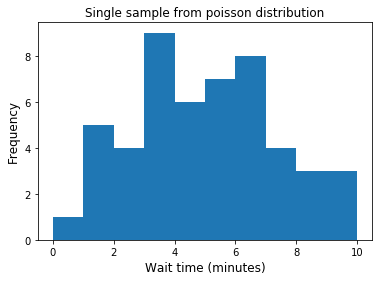

In [23]:
# Plot a single sample

pl.hist(wait_times.iloc[46,:-3])
pl.title("Single sample from poisson distribution", size = 12)
pl.xlabel('Wait time (minutes)', size = 12);
pl.ylabel('Frequency', size = 12);

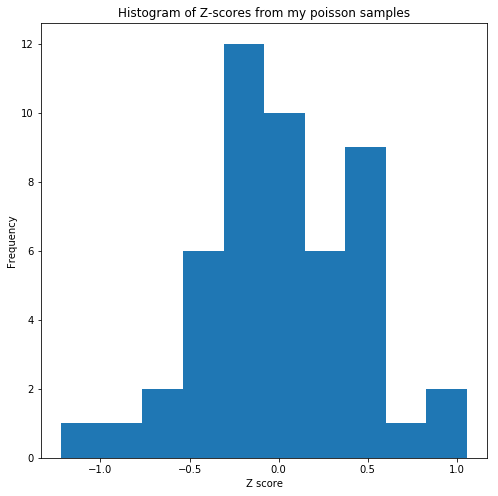

In [27]:
fig = pl.figure(figsize=(8,8)) 
ax = fig.add_subplot(111)

ax.hist(wait_times['z'])
ax.set_title("Histogram of Z-scores from my poisson samples")
ax.set_xlabel('Z score')
ax.set_ylabel('Frequency')

In [31]:
# Conduct KS and AD tests on the Z scores to see if they are normally distributed

print ("KS scores versus normal distribution", sp.kstest(wait_times['z'],'norm'))
print ("Z scores Scores on normal", sp.anderson(wait_times['z'], dist='norm'))


KS scores versus normal distribution KstestResult(statistic=0.23618670895081942, pvalue=0.0061529080268587499)
Z scores Scores on normal AndersonResult(statistic=0.27398832720195543, critical_values=array([ 0.538,  0.613,  0.736,  0.858,  1.021]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [ ]:
# Conclusion: yes, they are normally distributed. Success.